In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df_ventas = pd.read_csv(r'C:\Users\ivan_pinar\Dropbox\Creación de MOCs\MOC Master Python Análisis de Datos\Datasets\8.10\Ventas.csv',encoding = "ISO-8859-1",delimiter=';')

In [5]:
df_ventas["Total Venta"]=df_ventas["Total Venta"].apply(lambda x:x.replace(",","."))
df_ventas["Precio Unitario"]=df_ventas["Precio Unitario"].apply(lambda x:x.replace(",","."))

In [6]:
df_ventas["Total Venta"]=pd.to_numeric(df_ventas["Total Venta"])
df_ventas["Precio Unitario"]=pd.to_numeric(df_ventas["Precio Unitario"])

In [7]:
df_ventas

,ID_Pedido,Unidades,Precio Unitario,Total Venta,Fecha,Línea de Producto,Código de Producto,País,Territorio
0,2,30,95.70,2871.00,24/02/2020,Motorcycles,S10_1678,USA,NaN
1,5,34,81.35,2765.90,05/07/2020,Motorcycles,S10_1678,France,EMEA
2,2,41,94.74,3884.34,07/01/2020,Motorcycles,S10_1678,France,EMEA
3,6,45,83.26,3746.70,25/08/2020,Motorcycles,S10_1678,USA,NaN
4,14,0,100.00,0.00,10/10/2020,Motorcycles,S10_1678,USA,NaN
...,...,...,...,...,...,...,...,...,...
2816,15,20,100.00,2244.40,12/02/2021,Ships,S72_3212,Spain,EMEA
2817,1,29,100.00,3978.51,1/31/2022,Ships,S72_3212,Finland,EMEA
2818,4,86,100.00,10835.14,03/01/2022,Ships,S72_3212,Spain,EMEA
2819,1,34,62.24,2116.16,3/28/2022,Ships,S72_3212,France,EMEA


In [19]:
df_ventas.groupby(["Territorio"])["Total Venta"].agg('sum')

Territorio
APAC      813424.54
EMEA     5425563.64
Japan     459348.82
Name: Total Venta, dtype: float64

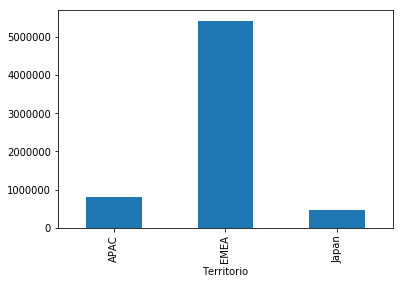

In [17]:
df_ventas.groupby(["Territorio"])["Total Venta"].agg('sum').plot(kind="bar")

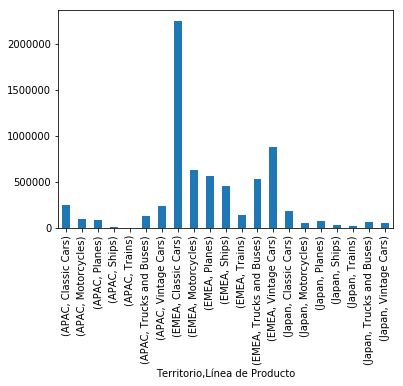

In [21]:
df_ventas.groupby(["Territorio","Línea de Producto"])["Total Venta"].agg('sum').plot(kind="bar")

# Ejercicio

In [4]:
df_peatones = pd.read_csv(r'C:\Users\ivan_pinar\Dropbox\Creación de MOCs\MOC Master Python Análisis de Datos\Datasets\8.10\PEATONES_2020_mod.csv',encoding = "ISO-8859-1",delimiter=';')

In [5]:
df_peatones.head()

,FECHA,HORA,IDENTIFICADOR,PEATONES,NÚMERO_DISTRITO,DISTRITO,NOMBRE_VIAL,NÚMERO,CÓDIGO_POSTAL,OBSERVACIONES_DIRECCION,LATITUD,LONGITUD
0,01/01/2020,0:00:00,PERM_PEA02_PM01,497.0,1.0,Centro,Calle Fuencarral,22.0,28004.0,Calle peatonal Datos en prueba,"40,4220090","-3,7008917"
1,01/01/2020,0:15:00,PERM_PEA02_PM01,244.0,1.0,Centro,Calle Fuencarral,22.0,28004.0,Calle peatonal Datos en prueba,"40,4220090","-3,7008917"
2,01/01/2020,0:30:00,PERM_PEA02_PM01,179.0,1.0,Centro,Calle Fuencarral,22.0,28004.0,Calle peatonal Datos en prueba,"40,4220090","-3,7008917"
3,01/01/2020,0:45:00,PERM_PEA02_PM01,174.0,1.0,Centro,Calle Fuencarral,22.0,28004.0,Calle peatonal Datos en prueba,"40,4220090","-3,7008917"
4,01/01/2020,1:00:00,PERM_PEA02_PM01,131.0,1.0,Centro,Calle Fuencarral,22.0,28004.0,Calle peatonal Datos en prueba,"40,4220090","-3,7008917"


In [ ]:
#¿cuál es la combinación distrito-nombre_vial que tiene en promedio un tráfico peatonal superior?

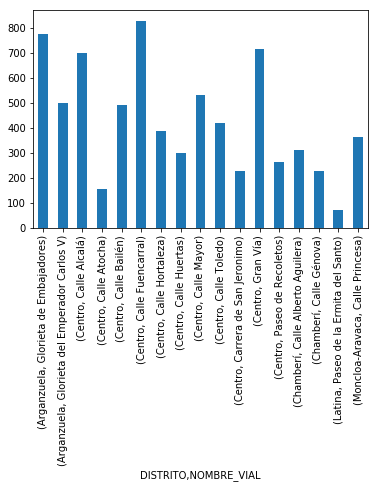

In [7]:
df_peatones.groupby(["DISTRITO","NOMBRE_VIAL"])["PEATONES"].agg("mean").plot(kind="bar")

In [ ]:
#¿cuál es la evolución tanto del mínimo como del máximo de tráfico de peatones diario? ¿Se observa anomalía en algún día concreto?

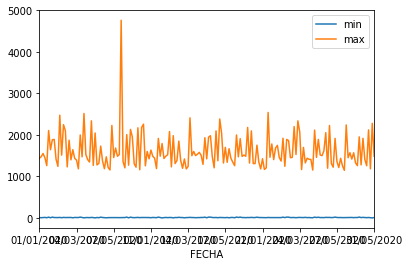

In [9]:
df_peatones[df_peatones["DISTRITO"]=="Centro"].groupby(["FECHA"])["PEATONES"].agg(["min","max"]).plot()

([<matplotlib.axis.XTick at 0x22f0f4bbd68>,
 <a list of 3 Text xticklabel objects>)

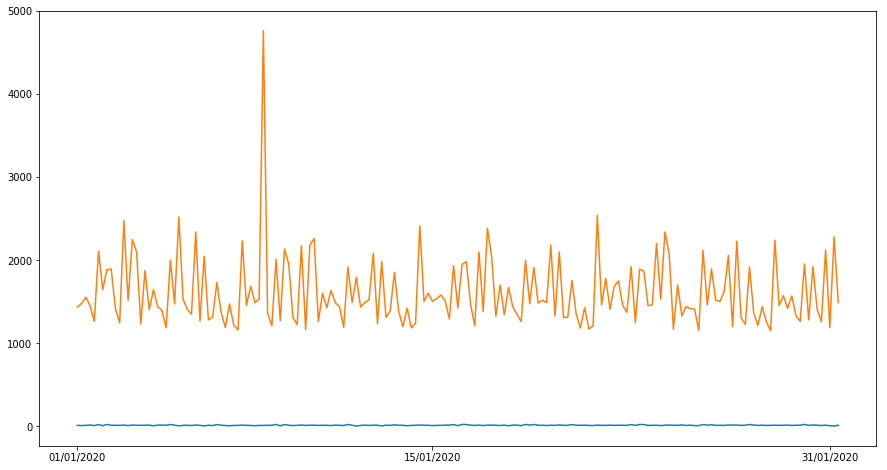

In [56]:
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.plot(df_peatones[df_peatones["DISTRITO"]=="Centro"].groupby(["FECHA"])["PEATONES"].agg(["min","max"]))
plt.xticks(ticks=["01/01/2020","15/01/2020","31/01/2020"])